In [1]:
%autosave 2
%matplotlib inline

Autosaving every 2 seconds


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
mat3 = loadmat("ex8_movies.mat")
mat4 = loadmat("ex8_movieParams.mat")
Y = mat3["Y"] # 1682 X 943 matrix, containing ratings (1-5) of 1682 movies on 943 user
R = mat3["R"] # 1682 X 943 matrix, where R(i,j) = 1 if and only if user j give rating to movie i
X = mat4["X"] # 1682 X 10 matrix , num_movies X num_features matrix of movie features
Theta = mat4["Theta"] # 943 X 10 matrix, num_users X num_features matrix of user features# Compute average rating 
print("Average rating for movie 1 (Toy Story):",np.sum(Y[0,:]*R[0,:])/np.sum(R[0,:]),"/5")

Average rating for movie 1 (Toy Story): 3.8783185840707963 /5


Text(0, 0.5, 'Movies')

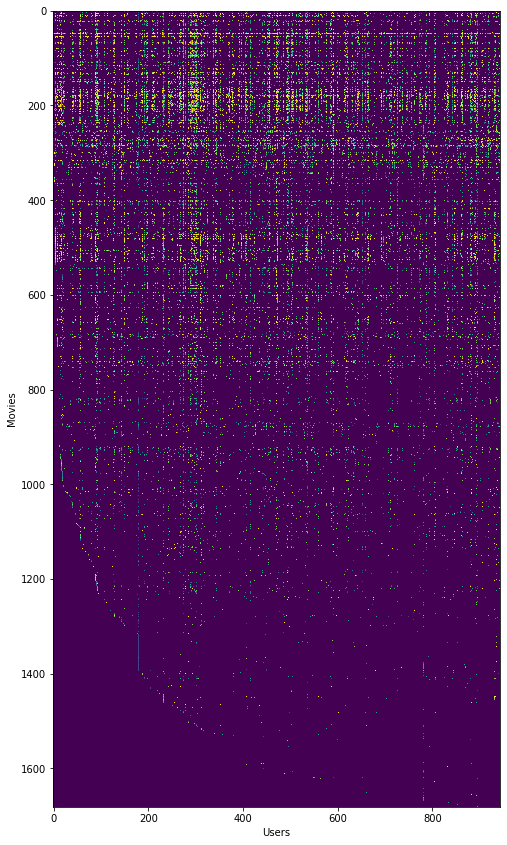

In [4]:
plt.figure(figsize=(8,16))
plt.imshow(Y)
plt.xlabel("Users")
plt.ylabel("Movies")

In [5]:
def cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda):
    X = params[:num_movies*num_features].reshape(num_movies, num_features)
    Theta = params[num_movies*num_features:].reshape(num_users, num_features)
    predictions = X @ Theta.T
    err = (predictions - Y)
    J = 0.5 * np.sum((err ** 2) * R)
    reg_X = (Lambda / 2) * np.sum(X ** 2)
    reg_theta = (Lambda / 2) * np.sum(Theta ** 2)
    reg_J = J + reg_X + reg_theta
    return reg_J
def cofiGradient(params, Y, R, num_users, num_movies, num_features, Lambda):
    X = params[:num_movies*num_features].reshape(num_movies, num_features)
    Theta = params[num_movies*num_features:].reshape(num_users, num_features)
    predictions = X @ Theta.T
    err = (predictions - Y)
    # Compute gradient
    X_grad = err*R @ Theta
    Theta_grad = (err*R).T @ X
    grad = np.append(X_grad.flatten(),Theta_grad.flatten())
    
    # Compute regularized gradient
    reg_X_grad = X_grad + Lambda*X
    reg_Theta_grad = Theta_grad + Lambda*Theta
    reg_grad = np.append(reg_X_grad.flatten(),reg_Theta_grad.flatten())
    return reg_grad

In [6]:
# Reduce the data set size to run faster
num_users, num_movies, num_features = 4,5,3
X_test = X[:num_movies,:num_features]
Theta_test= Theta[:num_users,:num_features]
Y_test = Y[:num_movies,:num_users]
R_test = R[:num_movies,:num_users]
params = np.append(X_test.flatten(),Theta_test.flatten())# Evaluate cost function
J = cofiCostFunc(params, Y_test, R_test, num_users, num_movies, num_features, 0)
print("Cost at loaded parameters:",J)
grad2 = cofiCostFunc(params, Y_test, R_test, num_users, num_movies, num_features, 1.5)
print("Cost at loaded parameters (lambda = 1.5):",grad2)

Cost at loaded parameters: 22.224603725685675
Cost at loaded parameters (lambda = 1.5): 31.344056244274217


In [7]:
with open('movie_ids.txt', 'r', encoding='ISO-8859-1') as file:
    content = file.read().split('\n')
    print(content)

['1 Toy Story (1995)', '2 GoldenEye (1995)', '3 Four Rooms (1995)', '4 Get Shorty (1995)', '5 Copycat (1995)', '6 Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', '7 Twelve Monkeys (1995)', '8 Babe (1995)', '9 Dead Man Walking (1995)', '10 Richard III (1995)', '11 Seven (Se7en) (1995)', '12 Usual Suspects, The (1995)', '13 Mighty Aphrodite (1995)', '14 Postino, Il (1994)', "15 Mr. Holland's Opus (1995)", '16 French Twist (Gazon maudit) (1995)', '17 From Dusk Till Dawn (1996)', '18 White Balloon, The (1995)', "19 Antonia's Line (1995)", '20 Angels and Insects (1995)', '21 Muppet Treasure Island (1996)', '22 Braveheart (1995)', '23 Taxi Driver (1976)', '24 Rumble in the Bronx (1995)', '25 Birdcage, The (1996)', '26 Brothers McMullen, The (1995)', '27 Bad Boys (1995)', '28 Apollo 13 (1995)', '29 Batman Forever (1995)', '30 Belle de jour (1967)', '31 Crimson Tide (1995)', '32 Crumb (1994)', '33 Desperado (1995)', '34 Doom Generation, The (1995)', '35 Free Willy 2: The Adventure Home 

In [8]:
# Initialize my ratings
my_ratings = np.zeros((1682,1))# Create own ratings
my_ratings[0] = 4 
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11]= 5
my_ratings[53] = 4
my_ratings[63]= 5
my_ratings[65]= 3
my_ratings[68] = 5
my_ratings[82]= 4
my_ratings[225] = 5
my_ratings[354]= 5
print("New user ratings:\n")
for i in range(len(my_ratings)):
    if my_ratings[i]>0:
        print("Rated",int(my_ratings[i]),"for index",content[i])

New user ratings:

Rated 4 for index 1 Toy Story (1995)
Rated 3 for index 7 Twelve Monkeys (1995)
Rated 5 for index 12 Usual Suspects, The (1995)
Rated 4 for index 54 Outbreak (1995)
Rated 5 for index 64 Shawshank Redemption, The (1994)
Rated 3 for index 66 While You Were Sleeping (1995)
Rated 5 for index 69 Forrest Gump (1994)
Rated 4 for index 83 Much Ado About Nothing (1993)
Rated 2 for index 98 Silence of the Lambs, The (1991)
Rated 5 for index 226 Die Hard 2 (1990)
Rated 5 for index 355 Sphere (1998)


In [9]:
def normalizeRatings(Y, R):
    """
    normalized Y so that each movie has a rating of 0 on average, and returns the mean rating in Ymean.
    """
    
    m,n = Y.shape[0], Y.shape[1]
    Ymean = np.zeros((m,1))
    Ynorm = np.zeros((m,n))
    
    for i in range(m):
        Ymean[i] = np.sum(Y[i,:])/np.count_nonzero(R[i,:])
        Ynorm[i,R[i,:]==1] = Y[i,R[i,:]==1] - Ymean[i]
        
    return Ynorm, Ymean

In [10]:
Y = np.hstack((my_ratings,Y))
R = np.hstack((my_ratings!=0,R))

In [11]:
Ynorm, Ymean = normalizeRatings(Y, R)

In [12]:
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10# Set initial Parameters (Theta,X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)
initial_parameters = np.append(X.flatten(),Theta.flatten())
Lambda = 10

In [13]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cofiCostFunc, fprime=cofiGradient, x0=initial_parameters.flatten(), args=(Ynorm, R, num_users, num_movies, num_features, Lambda))
result[0]

array([ 0.50070351, -0.76903389,  0.45402371, ...,  0.3279245 ,
       -0.59944331,  0.31543264])

In [14]:
result = result[0]
result.shape

(26260,)

In [15]:
# unfold paramaters
X = result[:num_movies*num_features].reshape(num_movies,num_features)
Theta = result[num_movies*num_features:].reshape(num_users,num_features)# Predict rating
p = X @ Theta.T
my_predictions = p[:,0][:,np.newaxis] + Ymean
import pandas as pd
df = pd.DataFrame(np.hstack((my_predictions,np.array(content[1:])[:,np.newaxis])))
df.sort_values(by=[0],ascending=False,inplace=True)
df.reset_index(drop=True,inplace=True)
print("Top recommendations for you:\n")
for i in range(10):
    print("Predicting rating",round(float(df[0][i]),1)," for index",df[1][i])

Top recommendations for you:

Predicting rating 5.0  for index 1294 Ayn Rand: A Sense of Life (1997)
Predicting rating 5.0  for index 815 One Fine Day (1996)
Predicting rating 5.0  for index 1123 Last Time I Saw Paris, The (1954)
Predicting rating 5.0  for index 1190 That Old Feeling (1997)
Predicting rating 5.0  for index 1654 Chairman of the Board (1998)
Predicting rating 5.0  for index 1501 Prisoner of the Mountains (Kavkazsky Plennik) (1996)
Predicting rating 5.0  for index 1468 Cure, The (1995)
Predicting rating 5.0  for index 1202 Maybe, Maybe Not (Bewegte Mann, Der) (1994)
Predicting rating 5.0  for index 1600 Guantanamera (1994)
Predicting rating 5.0  for index 1537 Cosi (1996)
